> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

### Questions

> - Does patient age play a role in the number of no shows.
> - Are patients from certain neighbourhoods less likely to not show up for an appointment.
> - Do pre-existing conditions make a difference in the likelihood of missing an appointment.
> - Do patients on scholarship show up a higher percentage of the time?
> - Does the day of the week an appointment is on contribute to no shows?
> - Do Males or Females have more no shows?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
sum(df.duplicated())

0

In [7]:
df.shape

(110527, 14)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [8]:
# Convert all column lables to lower case
df.columns = df.columns.str.lower()
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])


In [10]:
df['day_of_week'] = df['appointmentday'].dt.weekday_name


In [11]:
df['day_of_weekn'] = df['appointmentday'].dt.weekday

In [12]:
df['day_of_mthn'] = df['appointmentday'].dt.day

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
day_of_week       110527 non-null object
day_of_weekn      110527 non-null int64
day_of_mthn       110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(10), object(4)
memory usage: 14.3+ MB


In [14]:
#Rename column to use "_" instead of "-"
df=df.rename(columns = {'no-show':'no_show'})

In [15]:
#Kaggle site indicated that the handcap column was True/False.  
#Since values of 2, 3 & 4 were found, converting those to values of 1
df.handcap.replace((2,3,4), (1,1,1), inplace=True)

In [16]:
df['preexisting_condition'] = df[['diabetes', 'alcoholism','hipertension','handcap']].sum(axis=1)

In [17]:
#convert no show values from strings to integers for easier analysis.
df.no_show.replace(('Yes', 'No'), (1, 0), inplace=True)

In [18]:
# Cut age data to divide into groups
bin_edges = [-1, 18, 37, 55, 115] 

In [19]:
# Labels for the four age level groups
bin_names = ['18 and under', '19 to 37', '38 to 55', '56 and over'] # Name each acidity level category

In [20]:
# Creates acidity_levels column
df['age_groups'] = pd.cut(df['age'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day_of_week,day_of_weekn,day_of_mthn,preexisting_condition,age_groups
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,4,29,1,56 and over
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,4,29,0,56 and over
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,4,29,0,56 and over
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,4,29,0,18 and under
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,4,29,2,56 and over


In [21]:
# create data frames with subsets of data
df_noshow = df.query("no_show == 1")
df_show = df.query("no_show == 0")
df_sch = df.query("scholarship == 1")

### Analysis of no-shows by neighbourhood and no-shows with scholarship by neighbourhood 

> for reference
> - "nb" refers to neighbourhood
> - "sch" refers to scholarship
> - "nbsch" refers to neighbourood + scholarship

In [22]:
# Create data frame grouped by neighbourhood
df_nb = df.groupby('neighbourhood')['no_show'].count().reset_index()
df_nb.head()

,neighbourhood,no_show
0,AEROPORTO,8
1,ANDORINHAS,2262
2,ANTÔNIO HONÓRIO,271
3,ARIOVALDO FAVALESSA,282
4,BARRO VERMELHO,423


In [23]:
#create data frame with sum of no_show and scholarship data
df_nb_sum = df.groupby('neighbourhood')['no_show','scholarship'].sum().reset_index()
#rename columns for concat operation later
df_nb_sum = df_nb_sum.rename(columns = {'no_show':'nb_noshow', 'scholarship':'nb_sch'})

df_nb_sum.head()

,neighbourhood,nb_noshow,nb_sch
0,AEROPORTO,1,0
1,ANDORINHAS,521,323
2,ANTÔNIO HONÓRIO,50,14
3,ARIOVALDO FAVALESSA,62,52
4,BARRO VERMELHO,91,0


In [24]:
#Create datafrome grouped by neighbourhood for patients on scholarship
df_nbsch = df_sch.groupby('neighbourhood')['no_show','scholarship'].sum().reset_index()
df_nbsch = df_nbsch.rename(columns = {'no_show':'nbsch_noshow', 'scholarship':'nbsch_sch'})

df_nbsch.head()

,neighbourhood,nbsch_noshow,nbsch_sch
0,ANDORINHAS,92,323
1,ANTÔNIO HONÓRIO,5,14
2,ARIOVALDO FAVALESSA,8,52
3,BELA VISTA,47,225
4,BENTO FERREIRA,7,23


In [25]:
#set all indexes to neighbourhood for joining in next steps
df_nb.set_index('neighbourhood',inplace=True)
df_nb_sum.set_index('neighbourhood', inplace=True)
df_nbsch.set_index('neighbourhood', inplace=True)

In [26]:
#join the three dataframes into a single final dataframe which is joined on neighbourhood
df_tmp = df_nb.join(df_nb_sum, rsuffix="_del")
df_nb_final = df_tmp.join(df_nbsch,  rsuffix="_del2")
df_nb_final.head(10)

,no_show,nb_noshow,nb_sch,nbsch_noshow,nbsch_sch
neighbourhood,,,,,
AEROPORTO,8,1,0,NaN,NaN
ANDORINHAS,2262,521,323,92.0,323.0
ANTÔNIO HONÓRIO,271,50,14,5.0,14.0
ARIOVALDO FAVALESSA,282,62,52,8.0,52.0
BARRO VERMELHO,423,91,0,NaN,NaN
BELA VISTA,1907,384,225,47.0,225.0
BENTO FERREIRA,858,193,23,7.0,23.0
BOA VISTA,312,58,23,6.0,23.0
BONFIM,2773,550,373,90.0,373.0


In [27]:
df_nb_final.fillna(0, inplace=True)

In [28]:
# create proportion columns to normalize data for graphing
df_nb_final['All No Shows']=df_nb_final['nb_noshow']/ df_nb_final['no_show']
df_nb_final['Scholarship No Shows']=df_nb_final['nbsch_noshow']/df_nb_final['nbsch_sch']
df_nb_final.head()

,no_show,nb_noshow,nb_sch,nbsch_noshow,nbsch_sch,All No Shows,Scholarship No Shows
neighbourhood,,,,,,,
AEROPORTO,8,1,0,0.0,0.0,0.125000,NaN
ANDORINHAS,2262,521,323,92.0,323.0,0.230327,0.284830
ANTÔNIO HONÓRIO,271,50,14,5.0,14.0,0.184502,0.357143
ARIOVALDO FAVALESSA,282,62,52,8.0,52.0,0.219858,0.153846
BARRO VERMELHO,423,91,0,0.0,0.0,0.215130,NaN


In [29]:
#Drop unnecessary columns
df_nb_final.drop(['no_show','nb_noshow','nb_sch','nbsch_noshow','nbsch_sch'],axis=1,inplace=True)

In [30]:
def plot_data(df,ptype,hsize,vsize,ptitle,pxlabel,pylabel,pxtick_loc=None,pxtick_lbl=None,pxtick_rot=None,plegend_lbl=None):

    #Function to streamline plotting of data.  Currently only accepts parameters used in the analsys.
    #Inputs: dataframe, kind of plot, horiz and vert plot size, title, labels, xtick labels and orientation, legend labels
    #Return: None
   
    df.plot(kind=ptype,figsize=(hsize,vsize),title=ptitle)
    plt.xlabel(pxlabel,fontsize=12)
    plt.ylabel(pylabel,fontsize=12)
    if not pxtick_loc is None and not pxtick_lbl is None and not pxtick_rot is None:
        plt.xticks(pxtick_loc,pxtick_lbl,rotation=pxtick_rot)
    if not plegend_lbl is None:
        plt.legend(labels=plegend_lbl)

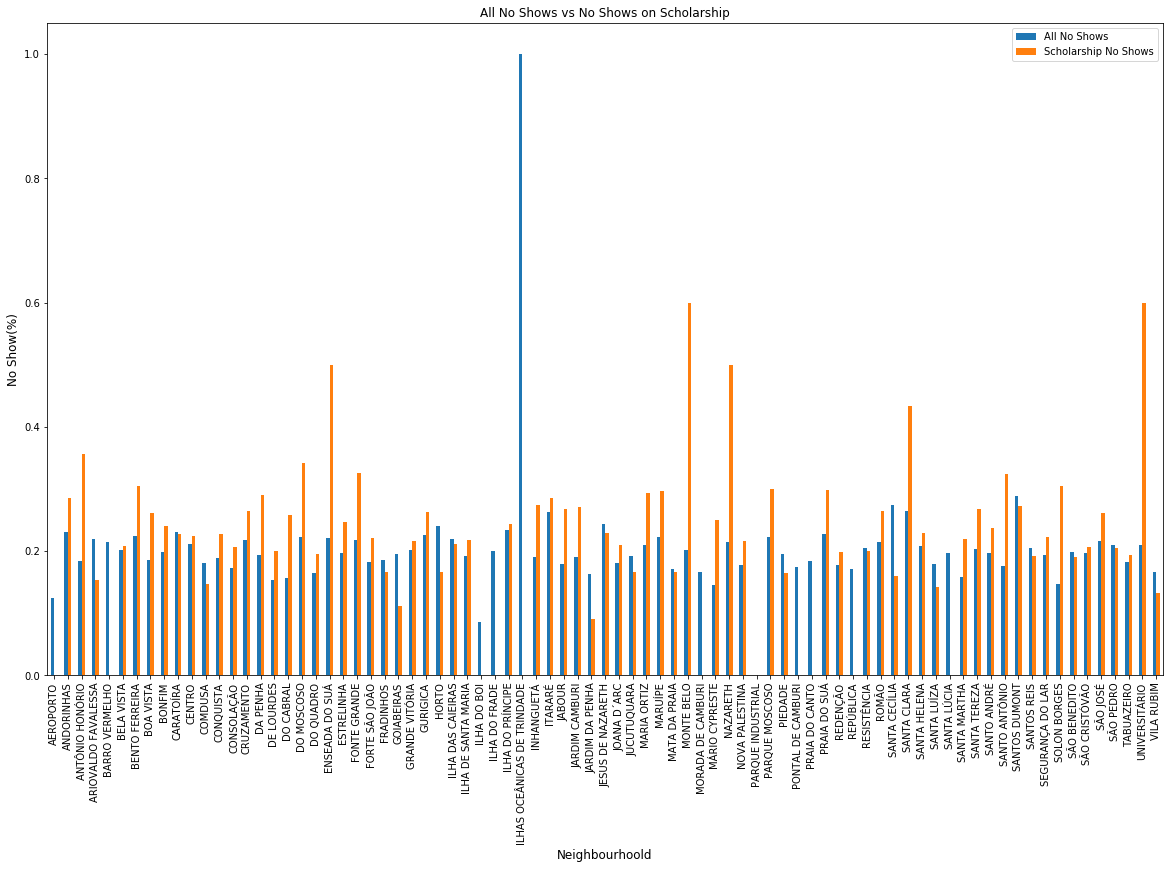

In [31]:
#df_nb_final.plot(kind='bar',figsize=(20,12),title="All No Shows vs No Shows on Scholarship")
#plt.xlabel("Neighbourhood",fontsize=12)
#plt.ylabel("Percent No Show",fontsize=12)
plot_data(df_nb_final,'bar',20,12,"All No Shows vs No Shows on Scholarship", "Neighbourhoold",'No Show(%)')

In [32]:
print("Mean percentage of No Shows: {}".format(df.query('no_show == 1')['no_show'].sum()/df.no_show.count()))

Mean percentage of No Shows: 0.20193255946510807


In [33]:
print("Mean percentage of No Shows for Patients on Scholarship: {}"
      .format(df_sch.query('no_show == 1')['no_show'].sum()/df_sch.no_show.count()))

Mean percentage of No Shows for Patients on Scholarship: 0.2373630420771568


### Analysis of Gender impacts no No Shows


In [34]:
total_male = df.query("gender == 'M'").patientid.count()
total_male

38687

In [35]:
total_female = df.query("gender == 'F'").patientid.count()
total_female

71840

In [36]:
male_noshow = df.query("gender == 'M' and no_show == 1").patientid.count()
female_noshow = df.query("gender == 'F' and no_show == 1").patientid.count()
male_noshow, female_noshow

(7725, 14594)

In [37]:
prop_male_noshow = male_noshow/total_male
prop_female_noshow = female_noshow/total_female
prop_male_noshow, prop_female_noshow

(0.19967947889471915, 0.20314587973273943)

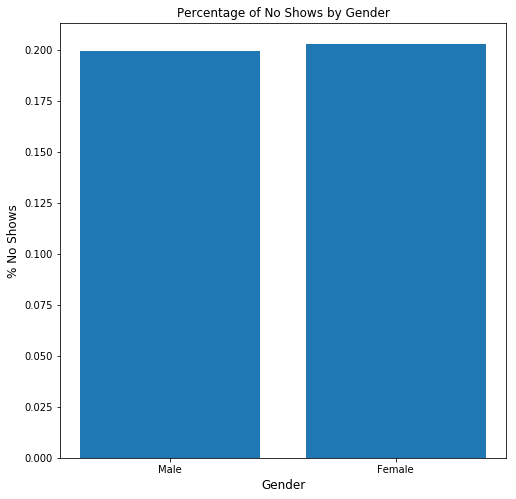

In [38]:
locations = [1, 2]
heights = [prop_male_noshow, prop_female_noshow]
labels = ['Male', 'Female']
plt.figure(figsize=(8,8))
plt.bar(locations, heights, tick_label=labels)
plt.title('Percentage of No Shows by Gender')
plt.xlabel("Gender",fontsize=12)
plt.ylabel('% No Shows',fontsize=12);

### Day of Week


In [39]:
df.groupby('day_of_week')['no_show'].sum()

day_of_week
Friday       4037
Monday       4690
Saturday        9
Thursday     3338
Tuesday      5152
Wednesday    5093
Name: no_show, dtype: int64

In [40]:
df.groupby('day_of_week')['no_show'].count()

day_of_week
Friday       19019
Monday       22715
Saturday        39
Thursday     17247
Tuesday      25640
Wednesday    25867
Name: no_show, dtype: int64

In [41]:
df_ns_by_dow = df.groupby('day_of_week')['no_show'].sum()/df.groupby('day_of_week')['no_show'].count()
df_ns_by_dow.head()

day_of_week
Friday      0.212261
Monday      0.206471
Saturday    0.230769
Thursday    0.193541
Tuesday     0.200936
Name: no_show, dtype: float64

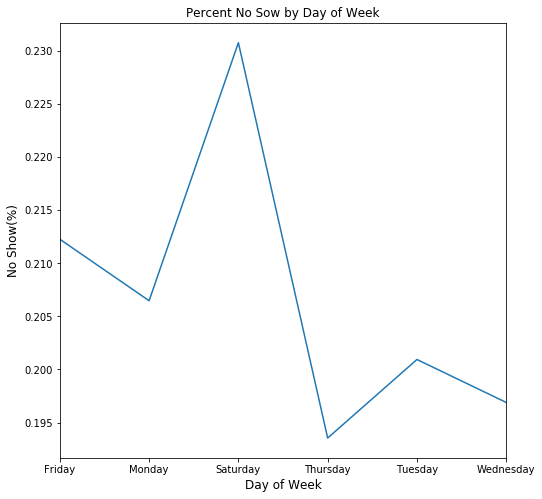

In [42]:
#outx = df_ns_by_dow.plot(kind='line',figsize=(8,8), title="Percent No Show by Day of Week")
#outx.set_xlabel('Day of Week',fontsize=12)
#outx.set_ylabel('Percent',fontsize=12)
plot_data(df_ns_by_dow,'line',8,8,'Percent No Sow by Day of Week','Day of Week','No Show(%)')

### SMS Received

In [43]:
df.groupby('sms_received')['sms_received'].sum()

sms_received
0        0
1    35482
Name: sms_received, dtype: int64

In [44]:
df.groupby('sms_received')['patientid'].count()

sms_received
0    75045
1    35482
Name: patientid, dtype: int64

In [45]:
#update
df_sms=df.groupby('sms_received')['no_show'].sum() / df.groupby('sms_received')['patientid'].count()

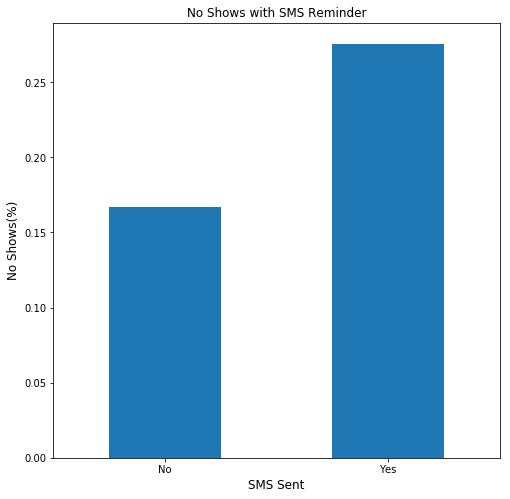

In [46]:
x=[0,1]
labels=['No','Yes']
#z=df_sms.plot(kind='bar',figsize=(8,8),title="Nolot_data(df,ptype,hsize,vsize,ptitle,pxlabel,pylabel,pxtick_loc,pxtick_lbl,pxtick_rot Shows with SMS Reminder")
#plt.xlabel("SMS Sent",fontsize=12)
#plt.ylabel('No Shows(%)',fontsize=12)
#plt.xticks(x, labels, rotation='horizontal');

#lot_data(df,ptype,hsize,vsize,ptitle,pxlabel,pylabel,pxtick_loc,pxtick_lbl,pxtick_rot
plot_data(df_sms,'bar',8,8,'No Shows with SMS Reminder','SMS Sent','No Shows(%)',x,labels,'horizontal')

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Age and Age Groups

In [47]:
# Generate data for plotting
df_age_noshow = df_noshow.groupby('age')['no_show'].count()/df.groupby('age')['no_show'].count()
df_sms_rcvd = df_noshow.groupby('age')['sms_received'].sum()/df.groupby('age')['sms_received'].count()
comb_data = pd.concat([df_age_noshow,df_sms_rcvd],axis=1)

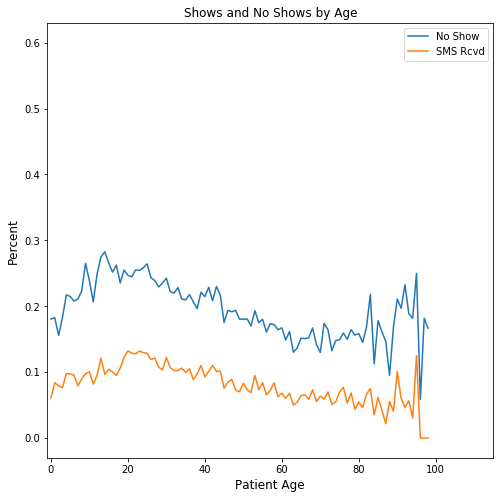

In [48]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#df_age_noshow = df_noshow.groupby('age')['no_show'].count()/df.groupby('age')['no_show'].count()
#df_age_show = df_show.groupby('age')['no_show'].count()/df.groupby('age')['no_show'].count()
#df_sms_rcvd = df_noshow.groupby('age')['sms_received'].sum()/df.groupby('age')['sms_received'].count()

legend_lbl=["No Show","SMS Rcvd"]
plot_data(comb_data,'line',8,8,'Shows and No Shows by Age','Patient Age','Percent',None,None,None,legend_lbl)

#plt.figure()
#comb_data.plot(figsize=(8,8),title="Shows and No Shows by Age")
#sh_plt = df_age_show.plot(figsize=(8,8))
#sms_plt = df_sms_rcvd.plot(figsize=(8,8))
#plt.xlabel('Patient Age',fontsize=12)
#plt.legend(labels=["No Show","SMS Rcvd"])
#plt.ylabel('Percent',fontsize=12);


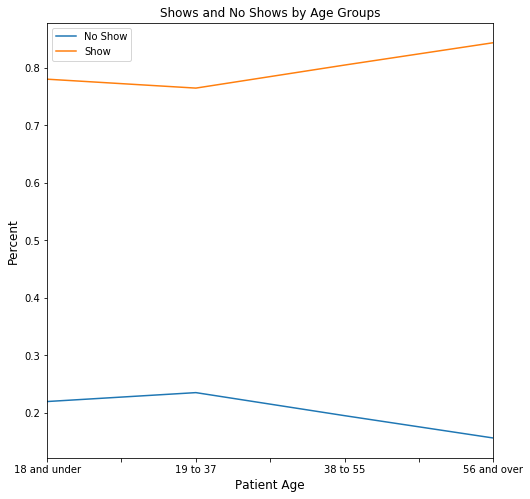

In [49]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_ageg_noshow = df_noshow.groupby('age_groups')['no_show'].count()/df.groupby('age_groups')['no_show'].count()
df_ageg_show = df_show.groupby('age_groups')['no_show'].count()/df.groupby('age_groups')['no_show'].count()

plt.figure()
ns_plt = df_ageg_noshow.plot(figsize=(8,8),title="Shows and No Shows by Age Groups")
sh_plt = df_ageg_show.plot(figsize=(8,8))
plt.xlabel('Patient Age',fontsize=12)
plt.legend(labels=["No Show","Show"])
plt.ylabel('Percent',fontsize=12);


### Research Question 2  (Replace this header name!)

In [50]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### Pre-existing conditionss

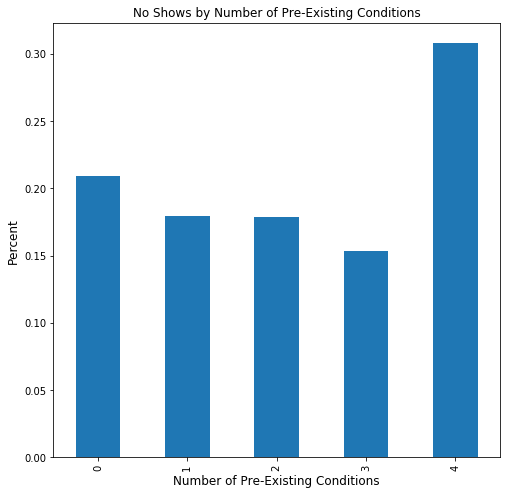

In [51]:
df_pre=df.groupby('preexisting_condition')['no_show'].sum() / df.groupby('preexisting_condition')['patientid'].count()

z=df_pre.plot(kind='bar',figsize=(8,8),title="No Shows by Number of Pre-Existing Conditions")
z.set_xlabel("Number of Pre-Existing Conditions",fontsize=12)
z.set_ylabel('Percent',fontsize=12);

In [52]:
df.groupby('preexisting_condition')['patientid'].count()

preexisting_condition
0    84115
1    18123
2     7658
3      618
4       13
Name: patientid, dtype: int64

In [53]:
list(df)

['patientid',
 'appointmentid',
 'gender',
 'scheduledday',
 'appointmentday',
 'age',
 'neighbourhood',
 'scholarship',
 'hipertension',
 'diabetes',
 'alcoholism',
 'handcap',
 'sms_received',
 'no_show',
 'day_of_week',
 'day_of_weekn',
 'day_of_mthn',
 'preexisting_condition',
 'age_groups']

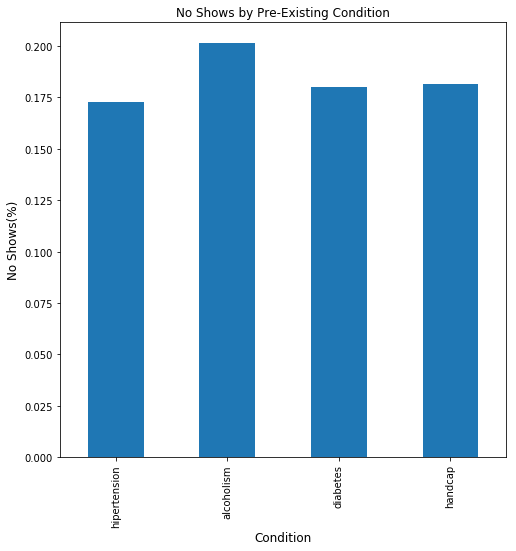

In [54]:
#Calculate ratios for each individual pre-existing condition.
df_cond = df_noshow[["hipertension","alcoholism","diabetes","handcap"]].apply(lambda row: np.sum(row),axis=0) / df[["hipertension","alcoholism","diabetes","handcap"]].apply(lambda row: np.sum(row),axis=0)
df_cond.plot(kind = 'bar',figsize=(8,8), title='No Shows by Pre-Existing Condition')
plt.xlabel("Condition",fontsize=12)
plt.ylabel('No Shows(%)',fontsize=12);

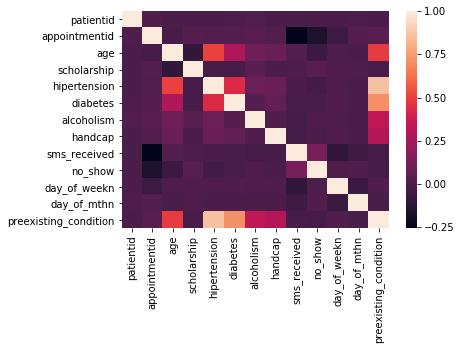

In [55]:
corr=df.corr()
sns.heatmap(corr)

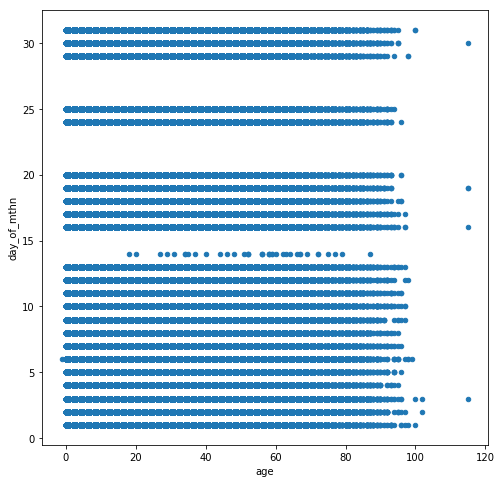

In [56]:
df.plot(kind='scatter',y='day_of_mthn',x='age',figsize=(8,8))

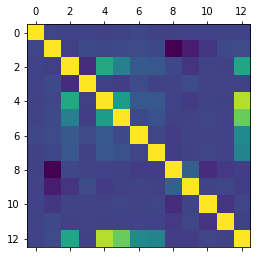

In [57]:


plt.matshow(df.corr())

In [69]:
df_matrix = df.copy()
df_matrix.drop(['appointmentday','preexisting_condition','patientid','scheduledday','neighbourhood','day_of_week','appointmentid','age_groups'],axis=1,inplace=True)

,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day_of_weekn,day_of_mthn
0,F,62,0,1,0,0,0,0,0,4,29
1,M,56,0,0,0,0,0,0,0,4,29
2,F,62,0,0,0,0,0,0,0,4,29
3,F,8,0,0,0,0,0,0,0,4,29
4,F,56,0,1,1,0,0,0,0,4,29


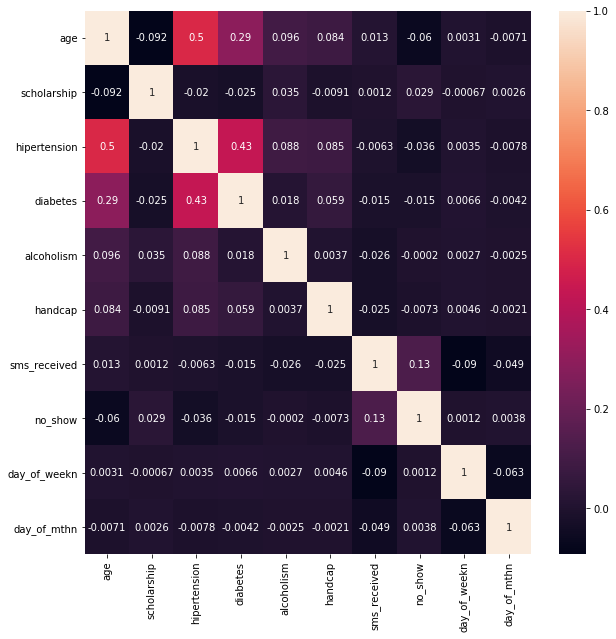

In [70]:
df_matrix = df.copy()
df_matrix.drop(['appointmentday','preexisting_condition','patientid','scheduledday','neighbourhood','day_of_week','appointmentid','age_groups'],axis=1,inplace=True)

fig, ax = plt.subplots(figsize=(10,10)) 
corr = df_matrix.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)